<h1>Thomas M. Boudreaux</h1>
<h2>Project 3</h2>
<h2>October 5th 2018</h2>

<h3>Introduction</h3>

Fluid dynamics reside in some of the most complex parameter spaces of any physical problems. Computer are an essential tool to the modern understanding of fluid dynamics due to their ability to make very accurate numerical estimates at small time steps in the future. Computational fluid dynamics (CDF) is the study of fluid dynamics questions through the use of computers. This field is usually "off-limits" to undergradueats; however Lorena A. Barba has provided a set of clear <a href="http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/">Jupyter notebooks</a> which allow students to break into the world of CDF. This notebook will serve as a high level overview of that 12 step course. This notebook will be broken into three sections: one dimension, two dimensions, and cavity flow. These sections loosley match those of the MOOC.

<h3>One Dimension</h3>

The starting point for getting into CDF is the one-dimensional material derivitive. I will start with the general form of the material derivitive for some wave with initial speed $c$ operating on some functional flow $u$.

$$ \left[\frac{\partial}{\partial t} + (c\cdot\nabla)\right]u $$
$$ \left[\frac{\partial u}{\partial t} + (c\cdot\nabla)u\right]  $$

in one dimension this simplifies too

$$ \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x}  $$

We can impose initial conditions such that

$$ \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0   $$

We are now in a situation where we can solve this numerically. We will follow the suggested method of the MOOC and use difference formulas to expand the differentials. I will show the steps to this here note however that the same technique will be used throughout, I will not go through these steps at each point.

We use a simple two point difference formula where we discritize in both time and space (time represented by $n$ and space by $i$) using the limit defiontion of a derivtive. 

$$ \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} + c\frac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x} = 0$$

We know what the initial velocity ($u_{i}^{n}$) is, what the steps in time and space are, and what the $i-1$ point is from initial and boundary conditions. Therefore this equation only has one unknown, which can be solved for

$$ u_{i}^{n+1}=u_{i}^{n}-c\frac{\Delta t}{\Delta x}(u_{i}^{n}-u_{i-1}^{n}) $$

Now we can simply iterate over each step to get the next value for $u_{i}^{n+1}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
unp1i = lambda uni, dt, dx, c, unim1: uni-c*(dt/dx)*(uni-unim1) 

In [4]:
nx = 41        # Number of discritized spatial elements
dx = 2/(nx-1)  # flow velocity in x direction
nt = 25        # Total time
dt = 0.025     # Time step
c = 1          # Fluid velocity multiplier

In [5]:
u = np.ones(nx)

We will set up out initial fluid distribution. This is equivilent to setting up a higher pressure of fluid in one region

In [6]:
u[int(0.5/dx):int(1/dx+1)] = 2

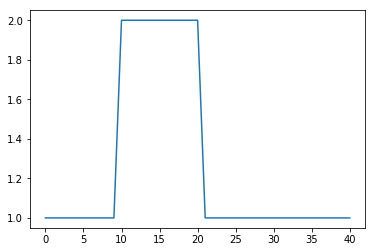

In [7]:
plt.plot(u)

In [8]:
un = np.ones(nx)

In [9]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = unp1i(un[i], dt, dx, c, un[i-1])

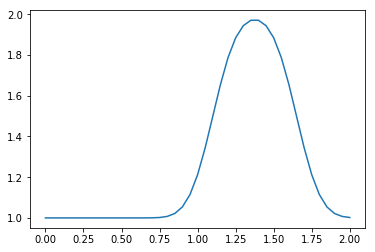

In [10]:
plt.plot(np.linspace(0, 2, nx), u)

Note how the region has smoothed out and moved (though not diffused, we have not given it that ability to do that yet). This is linear convection. 

If we let the velocity be variable (instead of the constant $c$) then we can solve for one dimensional non-linear convection. If we let the velocity multiplier be the solution to the position $u$ then the expression will be

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0   $$

Going through the same steps to discritize and solve this as before we arrive at

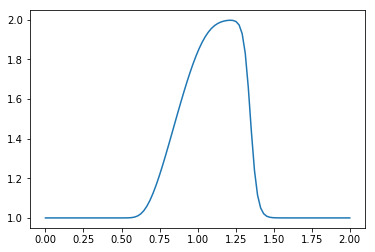

In [11]:
nx = 100
dx = 2/(nx-1)
nt = 100
dt = 0.0025

u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2

unp1i = lambda uni, dt, dx, unim1: uni-uni*(dt/dx)*(uni-unim1) 
un = np.ones(nx)
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = unp1i(un[i], dt, dx, un[i-1])
plt.plot(np.linspace(0, 2, nx), u)

Now we want to give the fluid the ability to diffuse, we are going to focus on adding <i>only</i> diffusion first. The general 3D diffusion equation is
$$ \frac{\partial u}{\partial t} = \nu\frac{\partial^{2}u}{\partial x^{2}} $$

When discritizing this expression we need to use a central difference formula, this can be seen in more detail in chapter 3 of the MOOC. Once we do discritize and solve for $u_{i}^{n+1}$ as before we arrive at

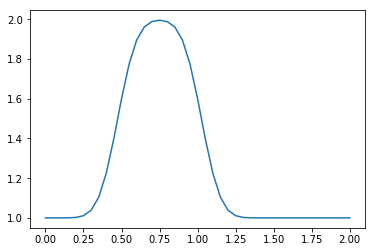

In [12]:
nx = 41
dx = 2/(nx-1)
nt = 10
nu = 0.3
sigma = 0.2
dt = (sigma*dx**2)/nu

u = np.ones(nx)
u[int(0.5/dx):int(1/dx + 1)] = 2

un = np.ones(nx)

unp1i = lambda uni, dt, dx, unim1, unip1, nu: uni+nu*dt/dx**2*(unip1-2*uni+unim1) 
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = unp1i(un[i], dt, dx, un[i-1], un[i+1], nu)
        
plt.plot(np.linspace(0, 2, nx), u)

Lets make this into a function so we may more easily see the diffusion

In [13]:
def diffuse1D(nx = 41, dx = 2/(41-1), nt = 10, nu = 0.3,
              sigma = 0.2, dt = (0.2*(2/(nx-1))**2)/0.3):
    u = np.ones(nx)
    u[int(0.5/dx):int(1/dx + 1)] = 2

    un = np.ones(nx)

    unp1i = lambda uni, dt, dx, unim1, unip1, nu: uni+nu*dt/dx**2*(unip1-2*uni+unim1) 
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx - 1):
            u[i] = unp1i(un[i], dt, dx, un[i-1], un[i+1], nu)

    plt.plot(np.linspace(0, 2, nx), u)

We can make this interactive using ipywidgets

In [14]:
from ipywidgets import interact, FloatSlider, IntSlider

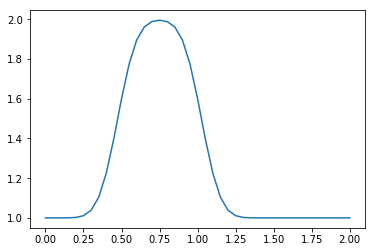

<function __main__.diffuse1D(nx=41, dx=0.05, nt=10, nu=0.3, sigma=0.2, dt=0.0016666666666666672)>

In [15]:
interact(diffuse1D, nt=IntSlider(min=0, max=100, value=10))

The final thing which we will investigate in one dimension is Burger's Equation, this will allow us to solve the second order non linear PDEs which will crop up latter on more easily. This also allows for discontinuous regions to spontaniously form, allowing for "shocks" in the fluid to emerge. Note that Burgeres equation emerges from equating the equation for non-linear convection to the diffusion equation and is generally given by
$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} =  \nu\frac{\partial^{2}u}{\partial x^{2}}$$

Using the same methods used in the previous steps this is discritized. We want to use slightly different initial conditions here which are signifignalty more difficult to solve for. For some initial condition $u$
$$ u = -\frac{2\nu}{\phi}\frac{\partial \phi}{\partial x} + 4$$
where
$$ \phi = e^{-\frac{(x-4t)^{2}}{4\nu(t+1)}}+e^{-\frac{(x-2\pi-4t)^{2}}{4\nu(t+1)}}$$
and having the boundary condition
$$u(0) = u(2\pi)$$

We want to use this expression to develop the initial conditions (initial distribution) for the system. We can use sympy to do this quickly.

In [19]:
import sympy as sym

In [54]:
x, nu, t = sym.symbols('x nu t')
phi = (sym.exp(-(x-4*t)**2 / (4*nu*(t+1))) + 
       sym.exp(-(x-4*t-2*sym.pi)**2 / (4*nu*(t+1))))

In [55]:
phi

exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))

In [56]:
dphidx = phi.diff(x)

In [57]:
dphidx

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))

Using the lambdify function to convert the sympy symbolic expression to a stanard python anaymous function

In [22]:
from sympy.utilities.lambdify import lambdify

In [59]:
u = -2*nu*(dphidx/phi)+4

In [60]:
uAnon = lambdify((t,x,nu), u)

Now we can set up the initial conditions

In [37]:
nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

In [72]:
x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)

t = 0

u = np.asarray([uAnon(t, x0, nu) for x0 in x])

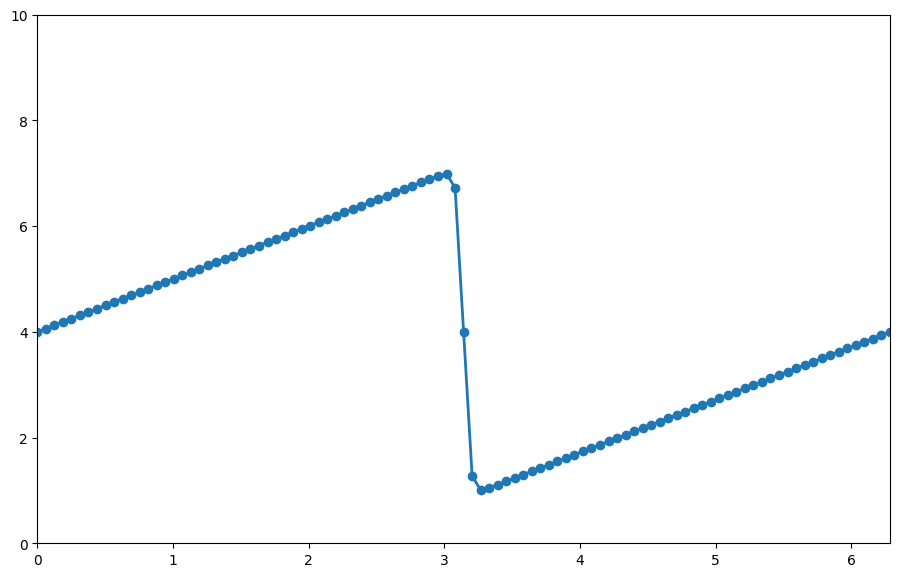

In [73]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);

Note how different this "Periodic initial condition" is from the initial setup we worked with before. This is a sawtooth wave. It may be interesting to explore some set of initial conditions.

Now using the discritized form of Burgers's eqaution

In [74]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])

    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
uAnalytic = np.asarray([uAnon(nt * dt, xi, nu) for xi in x])

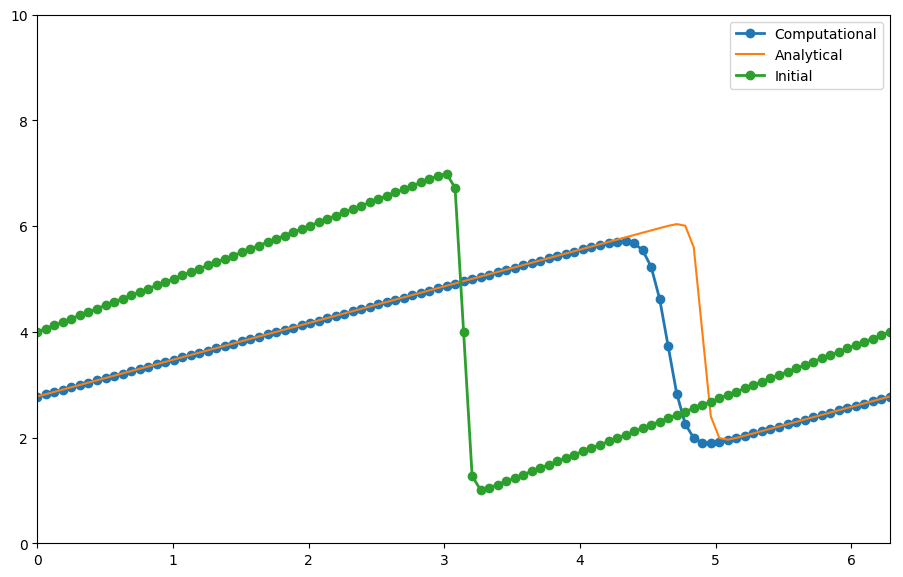

In [75]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2, label='Computational')
plt.plot(x, uAnalytic, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])

uinitial = np.asarray([uAnon(t, x0, nu) for x0 in x])
plt.plot(x, uinitial, marker='o', lw=2, label='Initial')

plt.legend();

Note that we are evolving both analytic solution and numeric solution in time.

A slightly different set of initial conditions can be created using numpy's built in math functions

In [48]:
nx = 101
nt = 500
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

(0, 6.283185307179586)

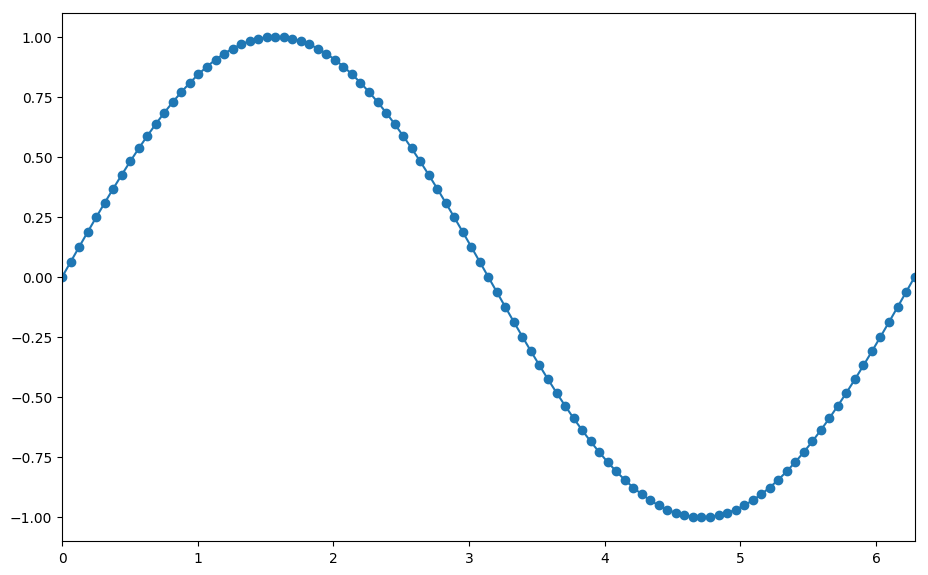

In [49]:
x = np.linspace(0, 2*np.pi, nx)
u = np.sin(x)
uinitial = np.sin(x)
un = np.empty(nx)

plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o')
plt.xlim([0, 2 * np.pi])

In [50]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])

    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]

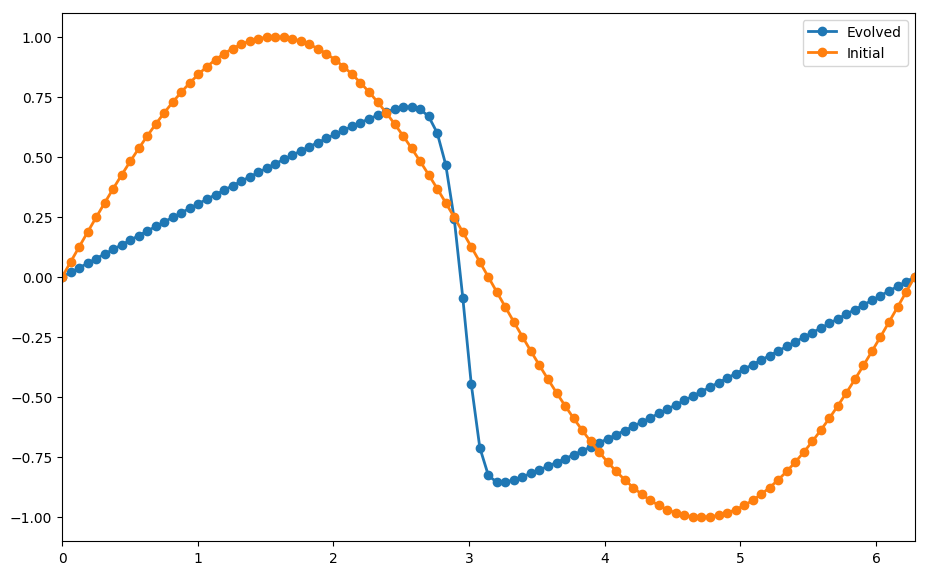

In [51]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2, label='Evolved')
plt.xlim([0, 2 * np.pi])

plt.plot(x, uinitial, marker='o', lw=2, label='Initial')

plt.legend();

Note the shock front forming fron the initially continous condition.

This concludes the one dimensional section of this notebook.

<h3>Two Dimensions</h3>

With one dimension we started with linear and non-linear convection. In two dimensions we will jump write into non-linear convection. We have a very similar expression, in fact, as is definiaional, we start at the same general form, the material derivitive of some flow rate.

$$ \left[\frac{\partial u}{\partial t} + (u\cdot\nabla)u\right] = 0 $$
$$ \left[\frac{\partial v}{\partial t} + (u\cdot\nabla)v\right] = 0 $$

Note that here because we have two degrees of freedom spatially, we have two components of velocity ($u$, and $v$) to be concerned with. So then instead of expanding this to one dimension we simply expand it to two dimensions

$$ \frac{\partial u}{\partial t} + u\left[\frac{\partial u}{\partial x} + \frac{\partial u}{\partial y}\right] = 0 $$
and
$$ \frac{\partial v}{\partial t} + u\left[\frac{\partial v}{\partial x} + \frac{\partial v}{\partial y}\right] = 0 $$

We discritize these the same as before. Now we have two unknowns, $u_{i}^{n+1}$ and $v_{i}^{n+1}$, this makes sense intuitivly as the new unknown is the analogy to the old unknown in the new spatial dimension. We will set up our ininitial conditions for non--linear convection very siilarly as well, as a single, square peak, but now in the 2D spatial plane.

In [86]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

In [87]:
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

This looks like

In [80]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

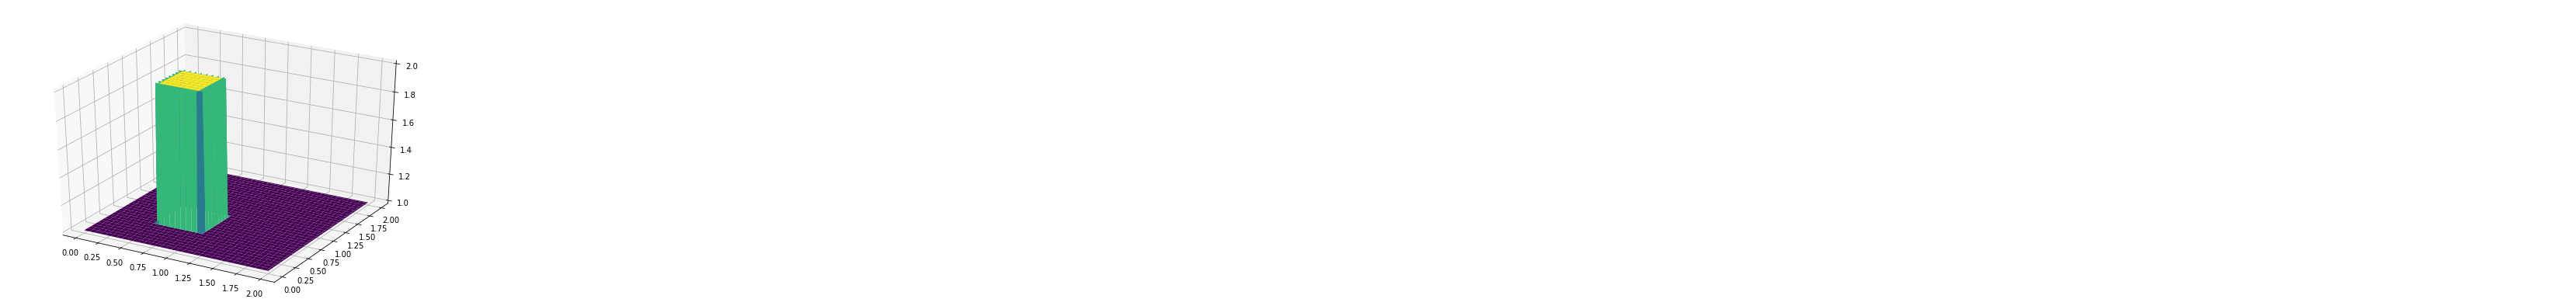

In [88]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

Integrating this using the discritized version of the positional matrix. Note how we need to update both $u$ and $v$.

In [89]:
for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] - (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))


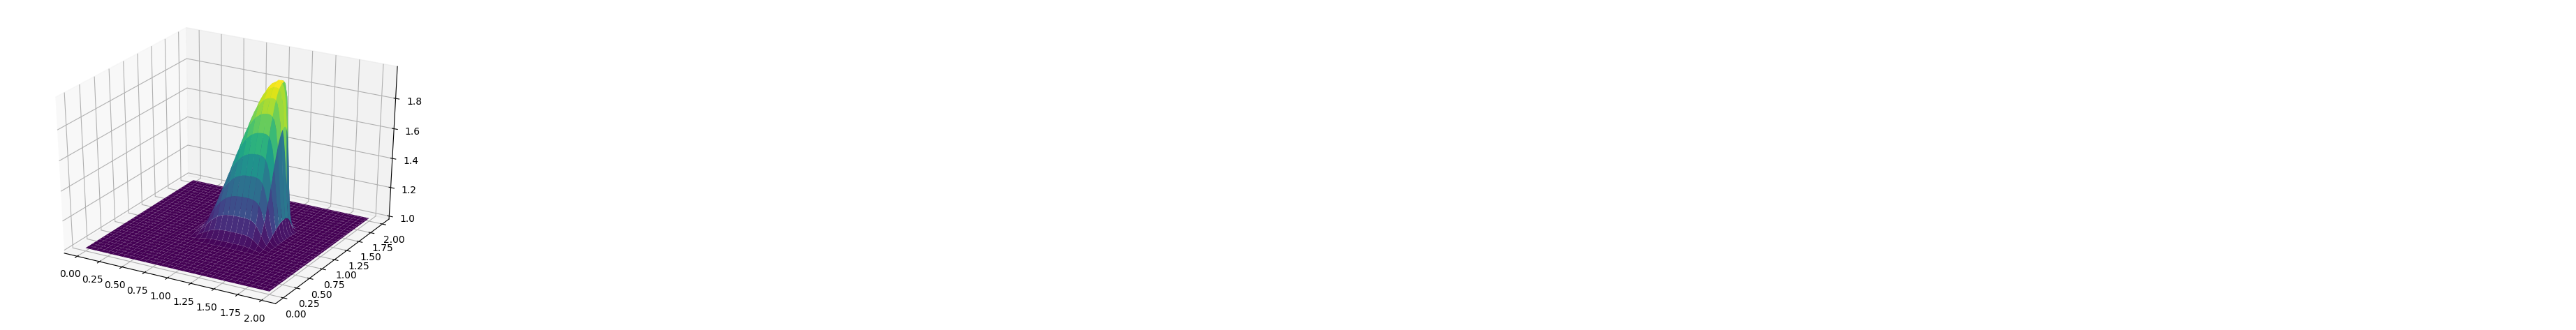

In [90]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

Now we want to look at diffusion in two dimensions. The expression is of very similar form to the one dimensional diffusion expression
$$ \frac{\partial u}{\partial t} = \nu\frac{\partial^{2}u}{\partial x^{2}} + \nu\frac{\partial^{2}v}{\partial x^{2}}$$

We discritize this and integrate it in the same manner as for the one dimensional diffuzive case, only now we must update a two dimensional array $u$.

In [91]:
def diffuse2D(u, nt):    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))

    
    return u

Setting up the same initial conditons

In [105]:
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

In [106]:
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

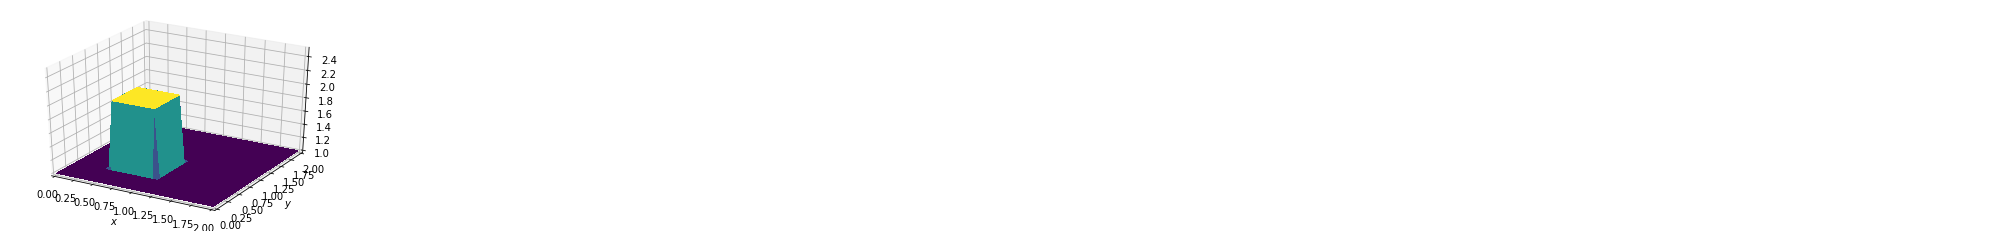

In [107]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

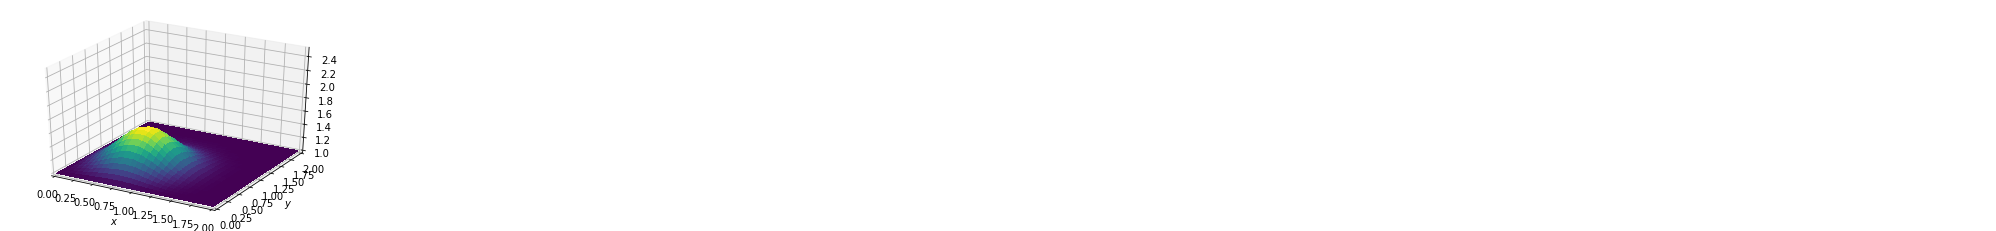

In [111]:
uDiffused = diffuse2D(u.copy(), 30)

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, uDiffused, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Now we want to work with Burger's equation in two dimensions. This has the same application's it did on one dimension. It allows for discontinous situations (shocks) to form from continous initial conditions. In two dimensions Burger's equations look like

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = \nu\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)$$
and
$$ \frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = \nu\left(\frac{\partial^{2} v}{\partial x^{2}}+\frac{\partial^{2} v}{\partial y^{2}}\right)$$

We discritize these. This is a good place to stop and note that the discrtizations become progressivly more "ugly" as the number of terms increase, but they do not become fundamentally more difficult to work through in any way other then algebrically. Sympy is your friend here, once you apply either a two point differnce or central differnce method to the differential elements use sympy to solve for $u_{i}^{n+1}$ and $v_{i}^{n+1}$ as they can get difficult to seperate by hand. Noting this we go through the same steps which have become old hat to us at this point, set up initial conditions and then integrate using our discritized expressions. I will also lock in the boundary conditions (noted in the code block).

In [112]:
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))

In [113]:
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

In [115]:
for n in range(nt + 1): ## Iterate over time
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
 
    # set boundary conditions
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

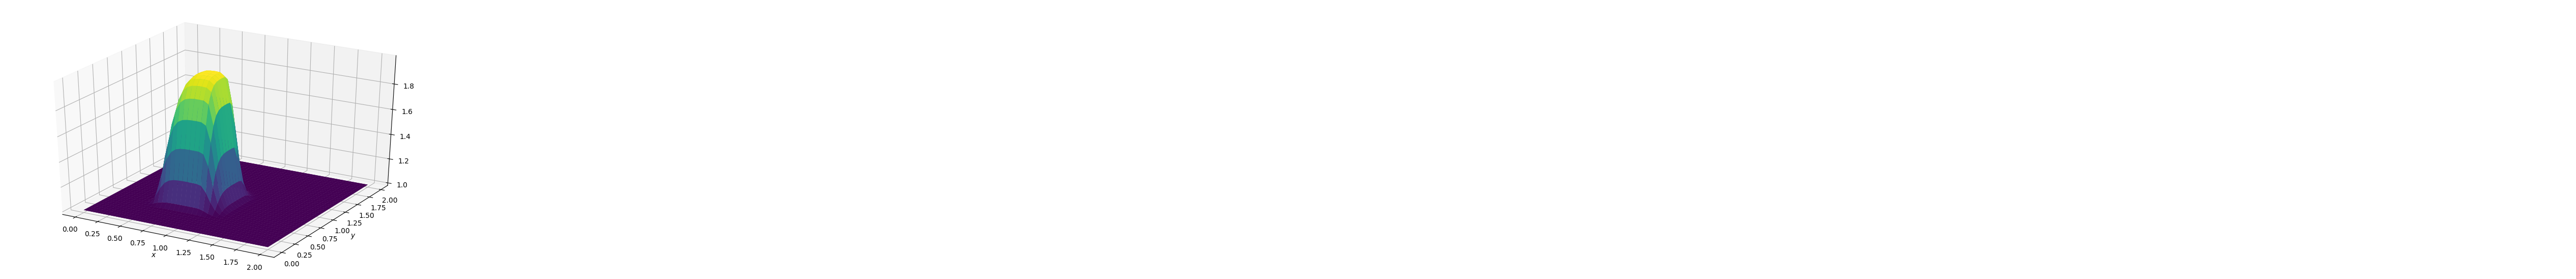

In [116]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Note the shock which has devloped on the trailing edge of the wave.

Now we are going to work with Laplace's Equation and we are going to have horrible flash backs from E&M and then push through them and realize that its not actually all that bad.

We are going to use the plot2D function provided as is, as it is a nice utility function

In [117]:
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

Laplaces Equation is generally defined as 
$$\nabla \cdot f = 0$$ 
for some vector field $f$. So for some function $p$ describing the pressure as a function of position in 2D
$$\nabla \cdot p = 0$$ 
$$\frac{\partial p}{\partial x}+\frac{\partial p}{\partial y} = 0$$ 
We can, as always discritize this (we'll use a central difference formula), set initial conditions, and integrate.

In [118]:
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

In [119]:
p = np.zeros((ny, nx))

In [120]:
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

In [121]:
p[:, 0] = 0
p[:, -1] = y**2
p[0, :] = p[1, :]
p[-1, :] = p[-2, :]

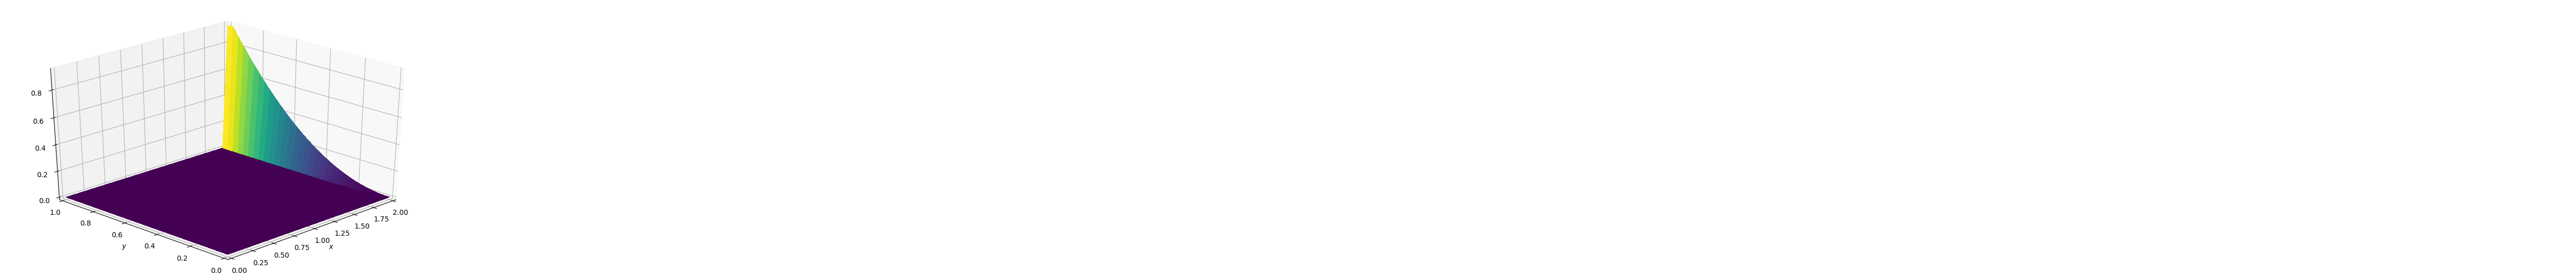

In [122]:
plot2D(x, y, p)

In [124]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    # Only evolve too when the change between the last and current
    #   time step is less than a certain value
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        # Set the boundary conditions
        p[:, 0] = 0  
        p[:, -1] = y  
        p[0, :] = p[1, :]
        p[-1, :] = p[-2, :]
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) / np.sum(np.abs(pn[:])))
     
    return p

In [125]:
p = laplace2d(p, y, dx, dy, 1e-4)

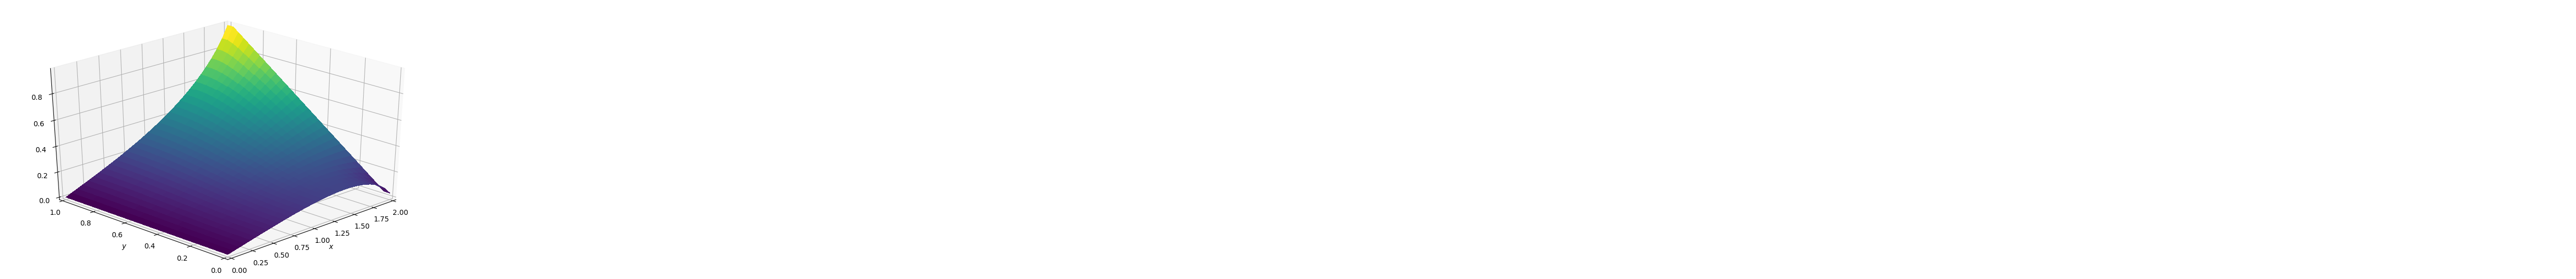

In [126]:
plot2D(x, y, p)

Note how solving Laplace's equations do not evolve a state through time, rather solve for the steady state of a system. 

Finally we are ready to tackle one case of the Navie-Stokes equations of fluid flow! We will look at the case of cavity flow, or flow with no sources or sinks

<h3>Cavity Flow</h3>

The Navie-Stokes Equations are a set of conservation equations, conservation of momentum, energy, and volume. A full derivation of the Navie-Stokes Equaquations may be found at wikipedia or in my scratch notebook, or in my nightmares from the week following when I worked out the derivation. Here we will start with the combination of the Cauchy momentum equation and the momentum conservation eqaution

$$ \frac{\partial \pmb{v}}{\partial t} + (\pmb{v}\cdot \nabla)\pmb{v} = -\frac{1}{\rho}\nabla p + \nu\nabla^{2}\pmb{v} $$

we have two equations from this, one for $u$, and one for $v$

$$ \frac{\partial u}{\partial t} + (u\cdot \nabla)u = -\frac{1}{\rho}\nabla p + \nu\nabla^{2}u $$
$$ \frac{\partial v}{\partial t} + (v\cdot \nabla)v = -\frac{1}{\rho}\nabla p + \nu\nabla^{2}v $$

We also have an expression relating the pressure of the fluid to the velocity, which is of the form

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

Again we discritize, set initial conditions, and integrate. The discritization for these is particually rough to solve for, but still fundamentally the same process as all the others.

In [129]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

As the MOOC does we will build a helper function to make the discritized expression easier to solve (in terms of visual ease of reading). I will use the function provided. Note here that as with all the 2D examples we have to work in both axes of the array simultanously

In [130]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b


We can then use the results of this function ($b$) to solve the rest of the discritized expression (again over both axes simultaniously). And set boundary conditions.

In [132]:
def pressure_poisson(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] 
        p[0, :] = p[1, :] 
        p[:, 0] = p[:, 1]
        p[-1, :] = 0
        
    return p

Using the cavity_flow function from the MOOC we see that it calls the build_b function (solving one part of the discritized possion equation), it then passes the result of that to the rest of the poisson solved. Therefore we have numerically solved poissons equation (the last of the three expressions defined above). We then us that to inform the solution to the first two expressions, which allows us to evolve the system through time. 

In [133]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
        u[-1, :] = 1
        v[0, :] = 0
        v[-1, :]=0
        v[:, 0] = 0
        v[:, -1] = 0
        
        
    return u, v, p

In [134]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

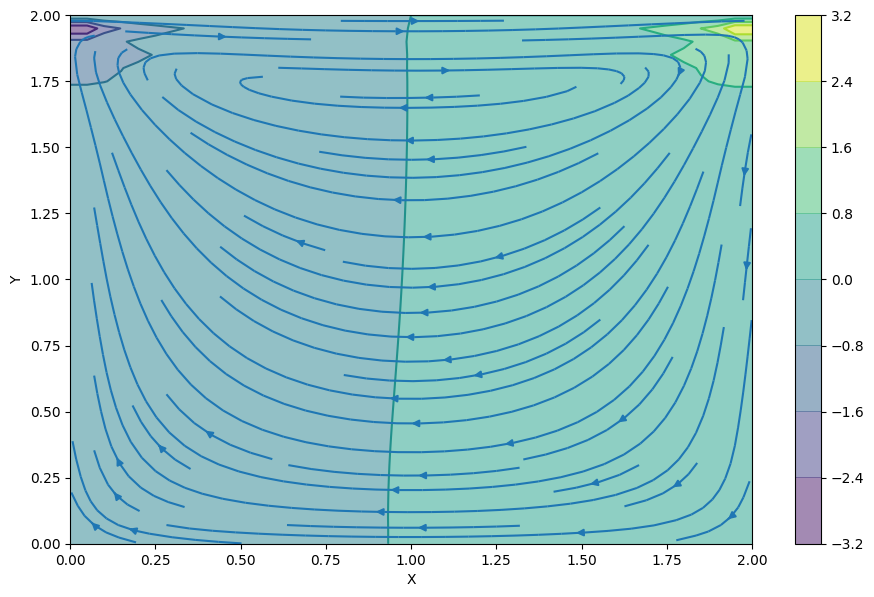

In [135]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.streamplot(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y');

If we increase the velocity in the x direction by a factor of 10 we see that we reach a different steady state with two "vortexes" as opposed to the one we see above.

In [137]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 20 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

In [138]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

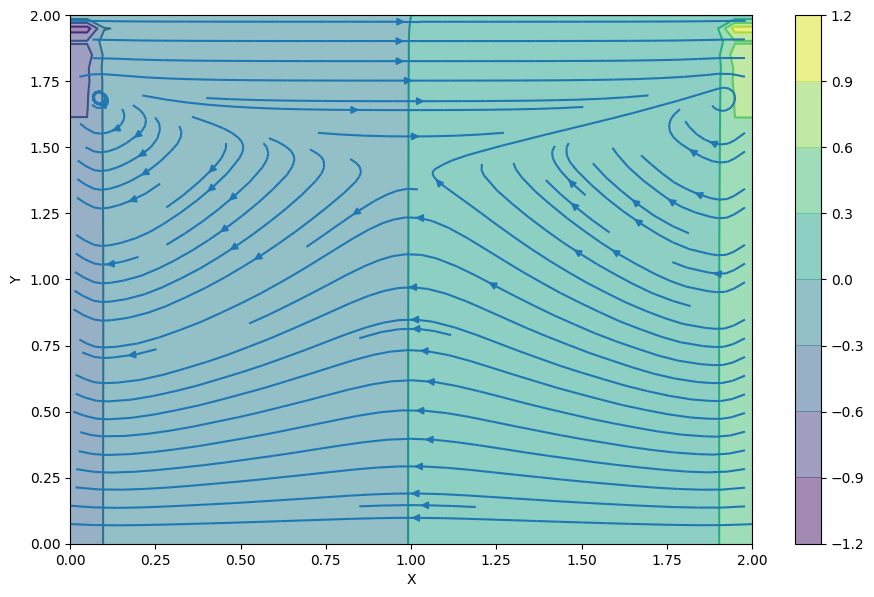

In [139]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.streamplot(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y');

<h3>Conclusion</h3>

I have provided a summarized version of a MOOC on computational fluid dynamics, much of the code is similar, as this is based on that course. One important takeaway from this is the similarity in all the steps. Each step involves taking some differential equation, discritizing it using the same method, settiing up some simple initial conditions, and integrating over time. This would be, while not trivial to extend to more dimensions, not signifigantly harder than the extension to 2, as the steps are the same. This is an area where I will keep working.